# NumPy Use Cases

Suppose you work for an e-commerce company that sells a variety of products online. Your company has collected data on customer purchases over the past few years and you have been tasked with analyzing this data to identify trends and patterns that can help drive business decisions.

To start with, you use NumPy to preprocess and clean the data. You create a NumPy array to store the purchase data for all customers, with each row representing a customer and each column representing a product. You then use NumPy's array indexing and slicing capabilities to remove any rows or columns with missing data or outliers.


In [1]:
import numpy as np

purchases_dtype = np.dtype([('customer_ID', 'i4')] + [(f'product_{ID}', 'i4') for ID in range(5)])

purchase_data_structured = np.array([
    (0, 1, 1, 0, 1, 1),
    (1, 0, 0, 1, 0, 1),
    (2, 1, 0, 1, 1, 1),
    (3, 0, 1, 0, 1, 3),
    (4, 0, 1, 1, 0, 1),
], dtype=purchases_dtype)

In [3]:
purchase_data_structured['product_1']

array([1, 0, 0, 1, 1])

In [4]:
purchase_data_structured['customer_ID']

array([0, 1, 2, 3, 4])

In this example, there are five customers and five products. Each row represents a customer and each column represents a product. A value of 1 indicates that the customer purchased the product, and a value of 0 indicates that they did not.

In [5]:
purchase_data_structured['customer_ID']

array([0, 1, 2, 3, 4])

In [7]:
numerical_fields = purchase_data_structured.dtype.names[1:]
purchase_data_numerical_fields = purchase_data_structured[[*numerical_fields]]

In [13]:
purchase_data_structured.dtype.names[1:]

('product_0', 'product_1', 'product_2', 'product_3', 'product_4')

In [6]:
price_data = np.array([2.99, 1.50, 4.99, 3.25, 6.49])

In [10]:
list(zip(numerical_fields, price_data))

[('product_0', 2.99),
 ('product_1', 1.5),
 ('product_2', 4.99),
 ('product_3', 3.25),
 ('product_4', 6.49)]

This assumes that the order of the prices in the array corresponds to the order of the products in the customer purchase array (i.e. the first element in price_array corresponds to the price of the first product in the purchase array).

Next, you use NumPy's universal functions to perform various operations on the data. For example, you use NumPy's mean and standard deviation functions to calculate the average purchase amount and identify any customers who spend significantly more or less than the average. You also use NumPy's argmax and argmin functions to identify the most and least popular products, respectively.


In [14]:
purchase_data = np.array([
    [0, 1, 1, 0, 1],
    [1, 0, 0, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 1, 0, 1],
    [1, 0, 1, 1, 0],
])

In [75]:
np.random.seed(42)
#print(np.random.get_state())
purchase_data = np.random.randint(2, size =(100,5))
#purchase_data[4, 3] = 100 # inserting outlier

In [76]:
purchase_data[:,3]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [71]:
import matplotlib.pyplot as plt

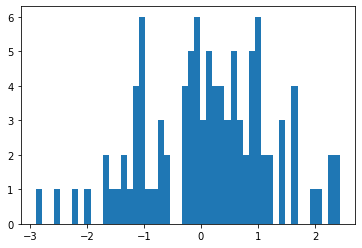

In [86]:
plt.hist(np.random.normal(size=100), bins=50)
plt.show()

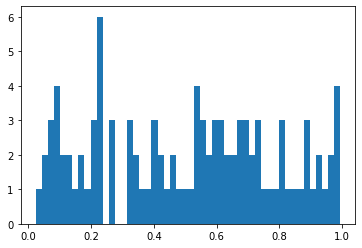

In [87]:
plt.hist(np.random.uniform(size=100), bins=50)
plt.show()

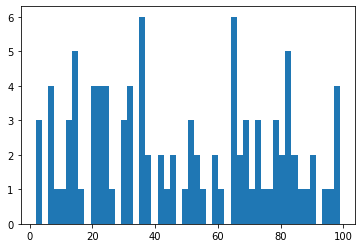

In [88]:
plt.hist(np.random.randint(low=1, high=100, size=100), bins=50)
plt.show()

In [89]:
# Calculate the total amount spent by each customer
total_spent = np.dot(purchase_data, price_data)

# Calculate the average purchase amount
avg_purchase = np.mean(total_spent)

# Calculate the standard deviation of purchase amounts
std_purchase = np.std(total_spent)

# Identify customers who spend significantly more or less than average
outliers = np.where((total_spent < (avg_purchase - 2 * std_purchase)) | 
                    (total_spent > (avg_purchase + 2 * std_purchase)))

# Print the results
print("Average purchase amount: ${:.2f}".format(avg_purchase))
print("Standard deviation of purchase amounts: ${:.2f}".format(std_purchase))
print("Outliers: {}".format(outliers))


Average purchase amount: $9.83
Standard deviation of purchase amounts: $4.86
Outliers: (array([12, 27, 30, 38, 42], dtype=int64),)


In [94]:
for customer in outliers:
    print(customer, total_spent[customer])

[12 27 30 38 42] [0. 0. 0. 0. 0.]


    The price_data array contains the price of each product, with one element per column.

    The code uses NumPy's dot() function to calculate the total amount spent by each customer, by multiplying the purchase amounts by the corresponding product prices. It then calculates the average purchase amount and standard deviation of purchase amounts using NumPy's mean() and std() functions.

    Finally, the code identifies customers who spend significantly more or less than average using NumPy's where() function to create a boolean mask of outliers. The mask is created by comparing each element of the total_spent array to the mean plus or minus two standard deviations. The where() function returns the indices of the elements that satisfy the mask, which are then printed out.

# Linear Regression Model Estimates


Lets gain a better understanding of another dataset, and use NumPy to build a linear regression model to predict a relationship between data. First, we are going to implement a simple linear regression using universal functions, then we are going to use NumPy's linear algebra capabilities to perform matrix operations, such as matrix multiplication and inverse, to estimate the model parameters. 

To make predictions we can use NumPy's broadcasting functionality to apply the model to new data.


In [95]:
import matplotlib.pyplot as plt

Data for the square footage and price of houses:

In [97]:
# Square footage of houses
x = np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])

# Price of houses
y = np.array([245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000, 319000, 255000])

We can visualize the relationship between price and square footage variables using a scatter plot.
Plot of the data using Matplotlib:

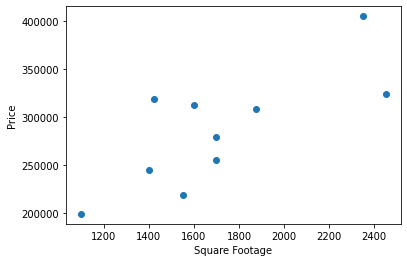

In [98]:
plt.scatter(x, y)
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

## Linear regression

$$Y = a+bX$$
$$Y = \text{Dependent Variable}$$
$$b = \text{Slope of the Line}$$
$$a = \text{Intercept}$$

In [99]:
def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x*y)
    x_sq_mean = np.mean(x**2)
    slope = (xy_mean - x_mean*y_mean)/(x_sq_mean - x_mean**2)
    y_intercept = y_mean - slope*x_mean
    return slope, y_intercept

In [100]:
slope, y_intercept = linear_regression(x, y)

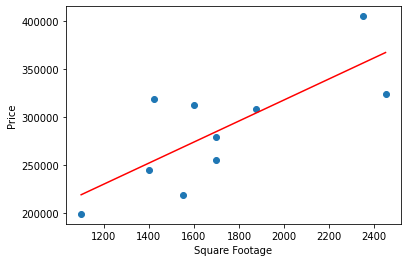

In [101]:
x_range = np.linspace(np.min(x), np.max(x), 100)
y_pred = slope*x_range + y_intercept
plt.scatter(x, y)
plt.plot(x_range, y_pred, color='red')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

In [104]:
price_pred = slope*3000 + y_intercept
print('The predicted price of a house with 3000 square feet is $', round(price_pred))

The predicted price of a house with 3000 square feet is $ 427552


## Coeficient of determination
$$R^2=1-\frac{RSS}{TSS}$$  
$$R^2 = \text{coeficient of determination}$$
$$RSS = \text{sum of squares of residuals (Unexplained Variation)}$$
$$TSS = \text{total sum of squares (Total Variation)}$$  

R-squared will give us an estimate of the relationship between movements of a dependent (y) variable based on an independent (x) variable's movements. It doesn't tell you whether your chosen model is good or bad, nor will it tell you whether the data and predictions are biased. [source](https://www.investopedia.com/terms/r/r-squared.asp)

In [105]:
y_pred = slope*x + y_intercept
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - ss_res/ss_tot
print('R-squared:', r_squared)

R-squared: 0.5808173118722724


## Linear Regression Using Matrix Multiplication

In [107]:
vector = np.array(list(range(6)))
vector

array([0, 1, 2, 3, 4, 5])

In [109]:
matrix = np.matrix([[1,2,3],
                    [4,5,6],
                    [7,8,9]])
matrix

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [110]:
vector.T

array([0, 1, 2, 3, 4, 5])

In [111]:
matrix.T

matrix([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

In [112]:
vector * 2

array([ 0,  2,  4,  6,  8, 10])

In [113]:
matrix * 2

matrix([[ 2,  4,  6],
        [ 8, 10, 12],
        [14, 16, 18]])

In [118]:
vector * vector

array([ 0,  1,  4,  9, 16, 25])

In [114]:
vector.dot(vector)

55

In [115]:
np.dot(vector,vector)

55

In [121]:
np.matrix(vector).dot(np.matrix(vector).T)

matrix([[55]])

In [125]:
np.matrix(vector)

matrix([[0, 1, 2, 3, 4, 5]])

In [122]:
np.matrix(vector).T

matrix([[0],
        [1],
        [2],
        [3],
        [4],
        [5]])

Linear regression model:
$$Y = \beta_{0}+\beta_{1} X+\epsilon$$  

$\beta_{0}$ and $\beta_{1}$ are intercept and slope of the linear equation.

In [126]:
X_mat=np.vstack((np.ones(len(x)), x)).T

In [127]:
X_mat[0:5]

array([[1.000e+00, 1.400e+03],
       [1.000e+00, 1.600e+03],
       [1.000e+00, 1.700e+03],
       [1.000e+00, 1.875e+03],
       [1.000e+00, 1.100e+03]])

We can get our parameter estimates in the form of matrix multiplications:
$$\hat{\beta}=(X^T.X)^{-1}.X^T.Y$$

In [128]:
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)

In [129]:
beta_hat

array([98248.32962138,   109.76773783])

In [130]:
# predict using coefficients
yhat = X_mat.dot(beta_hat)

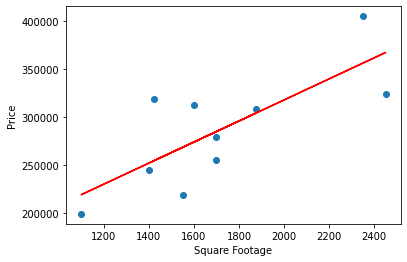

In [131]:
plt.scatter(x, y)
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.plot(x, yhat, color='red')


Based on your analysis and predictions, you can provide recommendations and how to optimize pricing.

In [139]:
np.savetxt("purchase_data.csv", purchase_data, delimiter=',')

np.loadtxt("purchase_data.csv", delimiter=',')

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 1., 1., 0.],
       [1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1.],
       [1., 1., 0., 1., 1.],
       [0., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 0.],
       [1., 1., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1.],
       [0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0.

> Content created by **Carlos Cruz-Maldonado**.  
> Feel free to ping me at any time.